In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('data/flats_moscow.csv')
# ссылка на датасет и документация: https://www.kaggle.com/hugoncosta/price-of-flats-in-moscow

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
Unnamed: 0    2040 non-null int64
price         2040 non-null int64
totsp         2040 non-null int64
livesp        2040 non-null int64
kitsp         2040 non-null float64
dist          2040 non-null float64
metrdist      2040 non-null int64
walk          2040 non-null int64
brick         2040 non-null int64
floor         2040 non-null int64
code          2040 non-null int64
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


In [2]:
raw_data.head(10)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
5,6,137,76,50,9.0,11.0,7,1,1,1,8
6,7,98,59,39,6.0,7.5,10,0,0,1,8
7,8,88,55,36,6.0,9.0,5,1,1,0,4
8,9,225,80,56,9.0,9.0,5,1,1,1,3
9,10,140,86,51,10.0,12.7,10,1,0,1,5


In [3]:
raw_data.pop('Unnamed: 0')
raw_data.pop('code')

0       3
1       6
2       3
3       1
4       3
       ..
2035    5
2036    4
2037    7
2038    3
2039    1
Name: code, Length: 2040, dtype: int64

In [4]:
raw_data['price'] = raw_data['price'] * 1000

In [5]:
df = raw_data
df

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,81000,58,40,6.0,12.5,7,1,1,1
1,75000,44,28,6.0,13.5,7,1,0,1
2,128000,70,42,6.0,14.5,3,1,1,1
3,95000,61,37,6.0,13.5,7,1,0,1
4,330000,104,60,11.0,10.5,7,0,1,1
...,...,...,...,...,...,...,...,...,...
2035,110000,77,45,10.0,12.0,5,0,0,1
2036,95000,60,43,6.0,9.0,5,0,0,1
2037,95000,60,46,5.0,10.5,5,1,0,1
2038,129000,76,48,10.0,12.5,5,0,0,1


In [6]:
# проверяем, есть ли пустые значения

def check_na(dataframe):
    for column in dataframe:
        print(column, any(dataframe[column].isnull()))
        
check_na(df)

price False
totsp False
livesp False
kitsp False
dist False
metrdist False
walk False
brick False
floor False


In [7]:
df.describe()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,127496.568627,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686
std,51878.219605,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918
min,50000.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,95000.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000
50%,115000.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000
75%,142000.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000
max,730000.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000


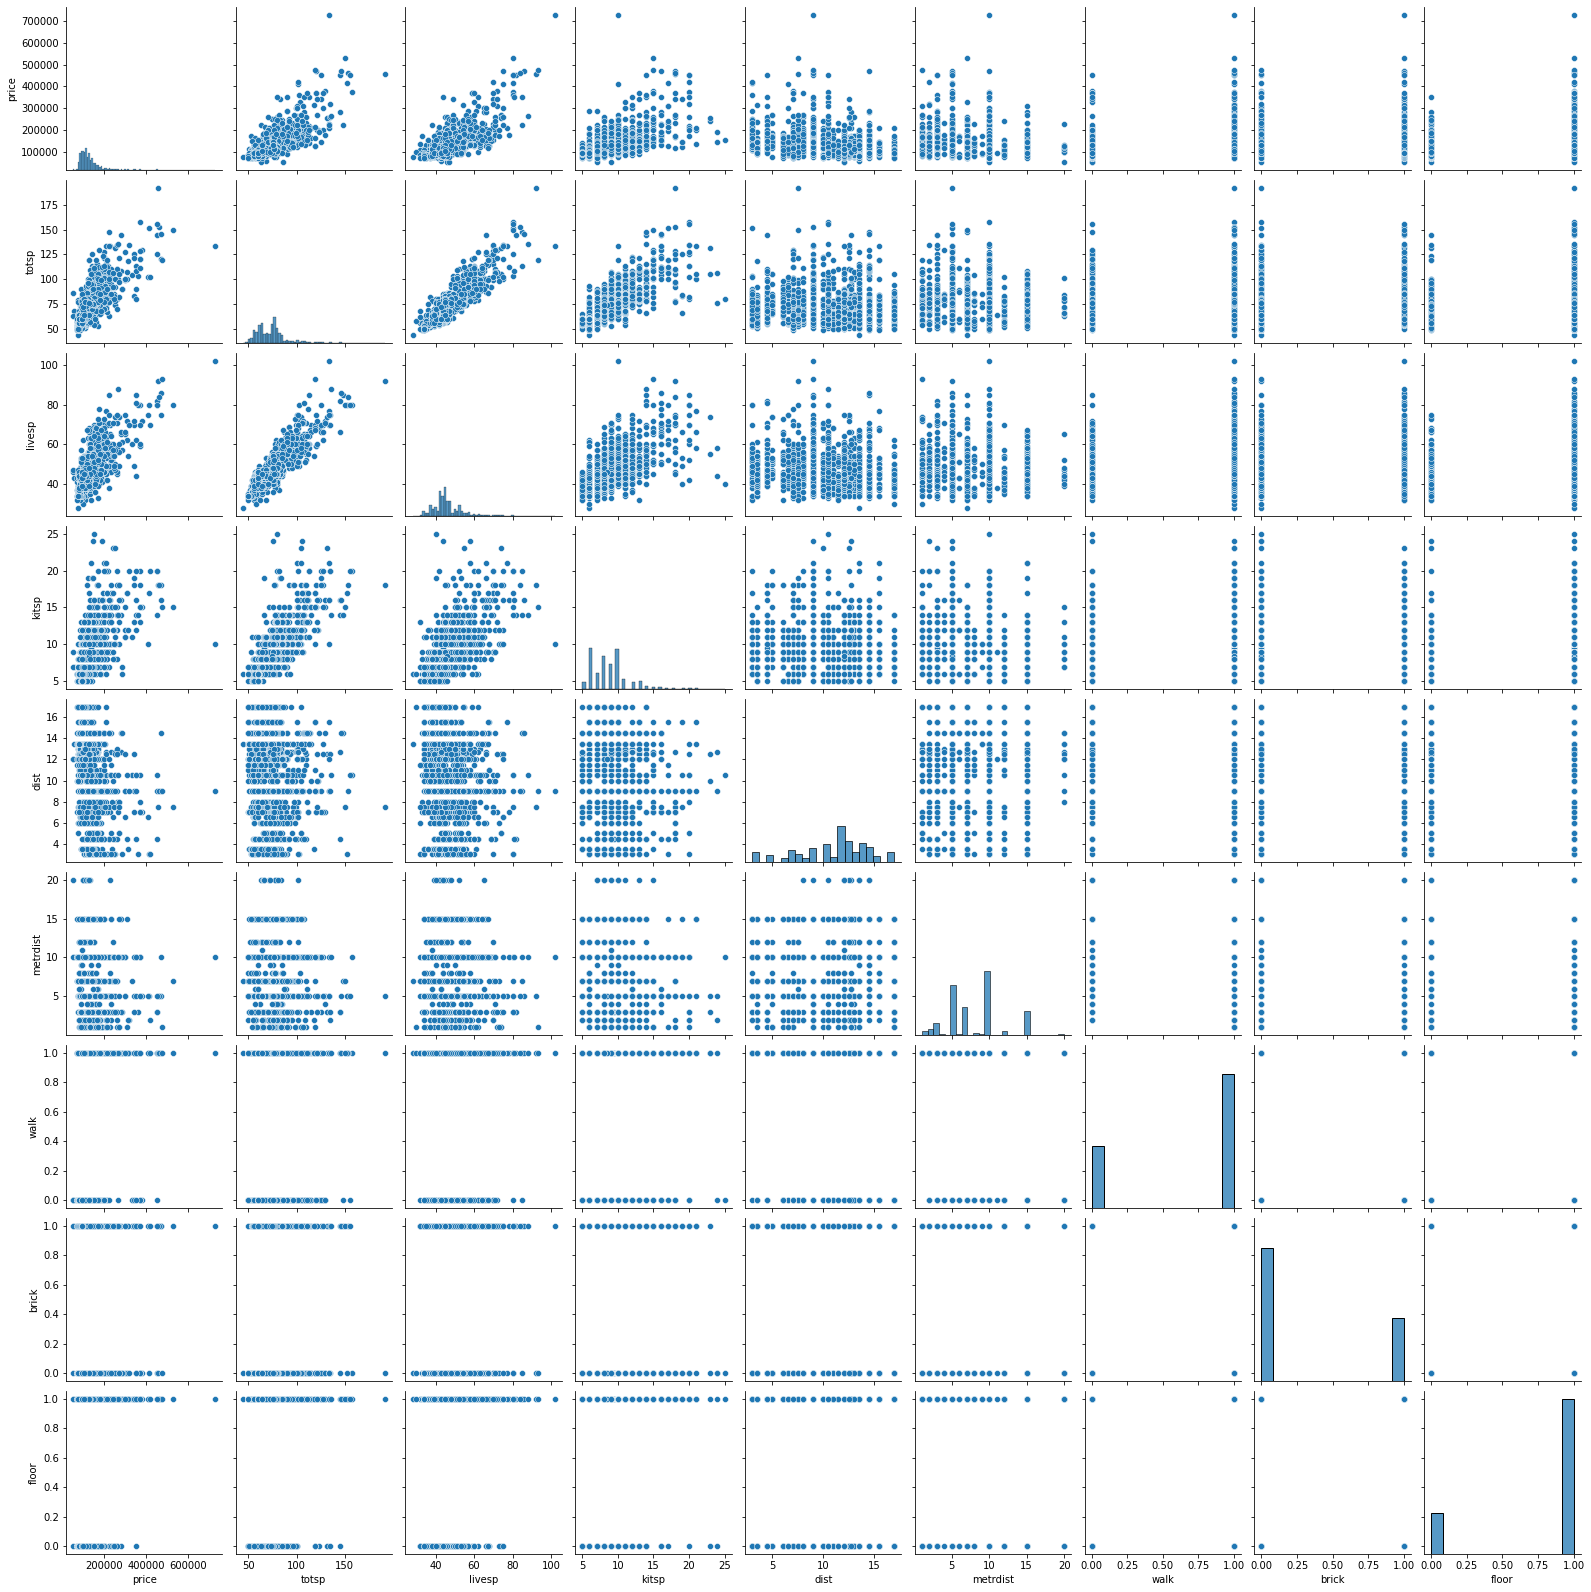

In [8]:
# делаем первичный анализ взаимосвязей всего со всем
sns.pairplot(df)

Text(0.5, 1.0, 'Зависимость цены от площади квартир')

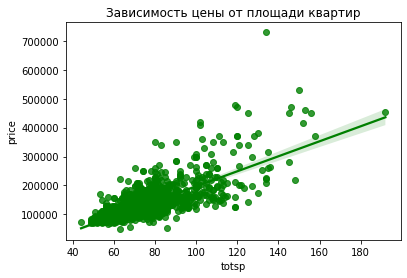

In [9]:
# Посмотрим зависимость цены от площади

sns.regplot(data=df, x='totsp', y='price', color='green')
plt.title('Зависимость цены от площади квартир')

# ВЫВОДЫ:
#     - Очевидно, что есть прямая корреляция между площадью квартиры и цены.
#     - Интересно, что площадь подавлящего большинства квартир не превышает 120 кв.м., а цена — 250000 тысяч долларов,
#     это ˜17,7 млн рублей.
#     - Также интересно, что цена квартир с одинаковой площадью в диапазоне 100-150 кв.м. может различаться больше,
#     чем в 2 раза.

<AxesSubplot:xlabel='dist', ylabel='price'>

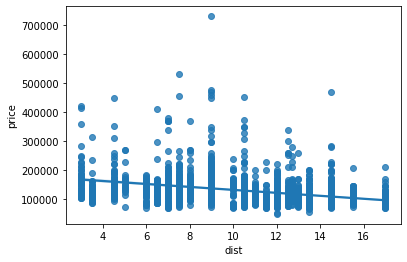

In [10]:
# Посмотрим, как меняется цена в зависимости от расстояния от центра.

sns.regplot(data=df, x='dist', y='price')

# ВЫВОДЫ:
#     - Тренд показывает, что чем ближе к центру, тем дороже.
#     - Но самые дорогие квартиры не в центре.

<AxesSubplot:xlabel='dist', ylabel='totsp'>

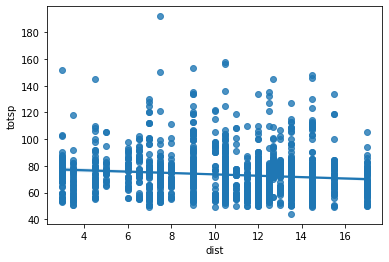

In [12]:
# Интересно, где больше больших квартир: в центре или дальше.

sns.regplot(data=df, x='dist', y='totsp')

# ВЫВОДЫ:
#     - Тренд показывает, что чем ближе к центру, тем больше квартиры.

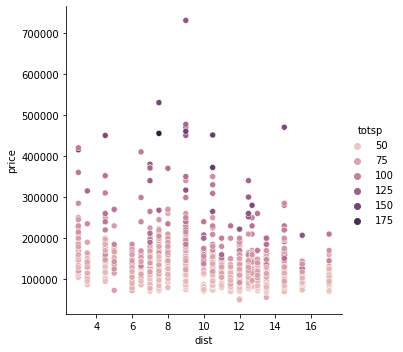

In [13]:
# Если объединить, будет красиво.

sns.relplot(data=df, x='dist', y='price', hue='totsp')

# ВЫВОДЫ: наглядно видно, что цена падает с удалением от центра и растет с ростом площади.

Text(0.5, 1.0, 'Как зависит цена от способа добраться до метро')

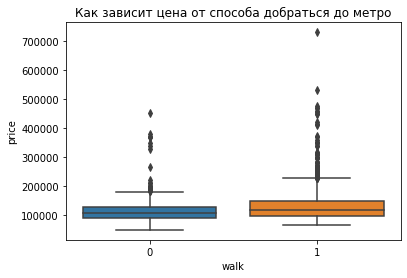

In [14]:
# Посмотрим, как меняется цена в зависимости от дистанции до метро

# На транспорте и пешком
sns.boxplot(data=df, x="walk", y="price")
plt.title('Как зависит цена от способа добраться до метро')

# ВЫВОДЫ:
#     - Квартиры, от которых нужно ехать до метро на транспорте, в среднем дешевле. Среди них меньше дорогих квартир. 
#     - Квариры, которые находятся от метро в пешей доступности, в среднем дороже. 
#     Среди них существенно больше дорогих квартир. Самые дорогие квартиры - именно такие.

Text(0.5, 1.0, 'Как зависит цена от типа дома')

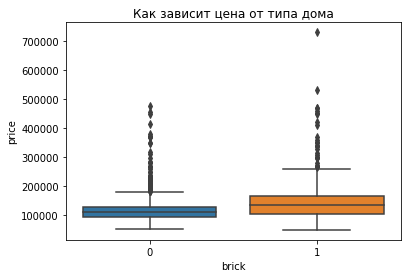

In [15]:
# Проверим зависимость цены от типа дома
sns.boxplot(data=df, x="brick", y="price")
plt.title('Как зависит цена от типа дома')

# ВЫВОДЫ:
#     - Квартиры в монолитных, кирпичных и домах с железобетонной конструкцией дороже, чем в других.

<AxesSubplot:title={'center':'Типы домов'}>

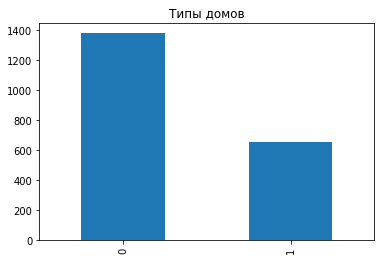

In [16]:
df_brick = df['brick'].value_counts()
df_brick.plot(kind='bar', title = 'Типы домов')

# ВЫВОДЫ: при этом монолитных, кирпичных и домов с ж/б конструкцией в 2 раза меньше, чем иных.

Text(0.5, 1.0, 'Распределение площадей квартир')

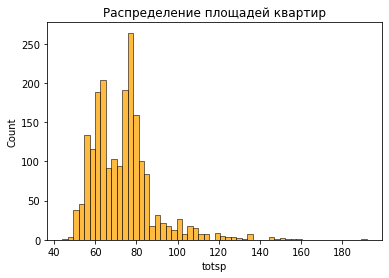

In [17]:
# Посмотрим, квартиры какой площади есть в Москве.

sns.histplot(df['totsp'], color='orange')
plt.title('Распределение площадей квартир')


# ВЫВОДЫ: 
#     - В основном есть квартиры от 50 до 65 кв.м. и от 75 до 90 кв.м.
#     - Большие квартиры — редкость.

In [18]:
# Heatmap, который почти ни о чем нам не говорит.

df_heatmap = df.pivot_table(
                        index='dist', 
                        columns='metrdist', 
                        values='price', 
                        aggfunc=sum).fillna(0)

df_heatmap

metrdist,1,2,3,4,5,6,7,8,9,10,11,12,15,20
dist,,,,,,,,,,,,,,
3.0,0.0,605000.0,2040000.0,0.0,2342000.0,0.0,254000.0,160000.0,0.0,2460000.0,0.0,133000.0,1590000.0,0.0
3.5,190000.0,605000.0,987000.0,126000.0,1019000.0,0.0,783000.0,0.0,0.0,1401000.0,0.0,203000.0,245000.0,0.0
4.5,175000.0,901000.0,980000.0,0.0,2074000.0,0.0,1152000.0,0.0,0.0,1792000.0,0.0,229000.0,572000.0,0.0
5.0,880000.0,0.0,0.0,230000.0,598000.0,0.0,348000.0,143000.0,0.0,1402000.0,0.0,125000.0,177000.0,0.0
6.0,170000.0,470000.0,305000.0,0.0,1417000.0,0.0,1253000.0,0.0,0.0,1419000.0,0.0,0.0,482000.0,0.0
6.5,499000.0,140000.0,599000.0,0.0,2427000.0,0.0,579000.0,0.0,0.0,734000.0,0.0,240000.0,350000.0,0.0
7.0,274000.0,494000.0,1266000.0,0.0,3319000.0,0.0,1908000.0,130000.0,0.0,4393000.0,0.0,212000.0,770000.0,0.0
7.5,0.0,385000.0,996000.0,0.0,3656000.0,90000.0,2930000.0,0.0,0.0,3282000.0,0.0,244000.0,793000.0,0.0
8.0,0.0,291000.0,170000.0,0.0,1909000.0,0.0,937000.0,0.0,0.0,2340000.0,0.0,0.0,1140000.0,112000.0


<AxesSubplot:xlabel='metrdist', ylabel='dist'>

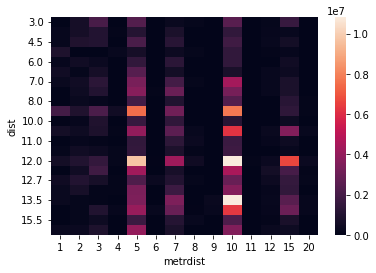

In [19]:
sns.heatmap(df_heatmap)

# ВЫВОДЫ: самые дорогие квартиры находятся не в центре и не слишком близко к метро (пешком или на транспорте).